<a href="https://colab.research.google.com/github/Vikas5050/Underwater-Image-Processing/blob/main/fusion_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

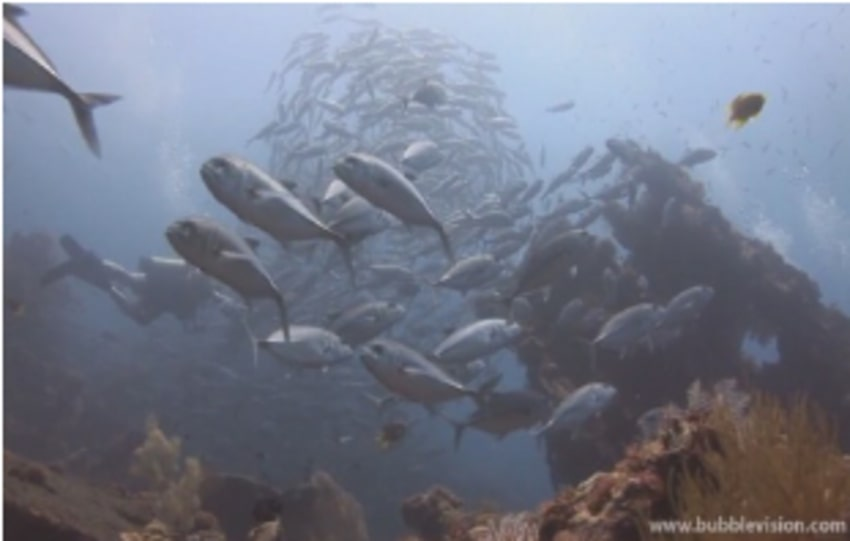

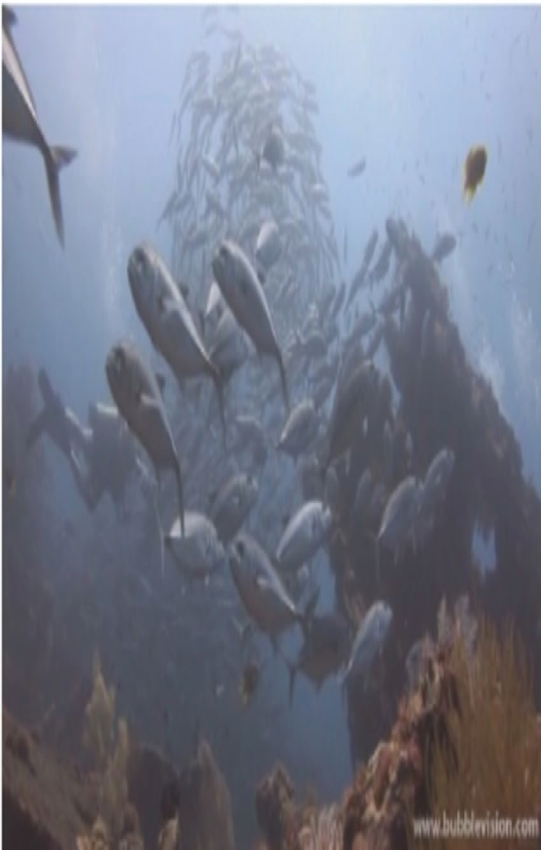

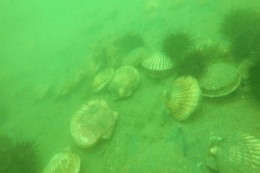

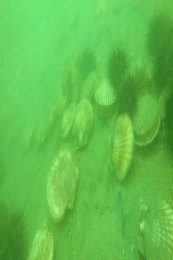

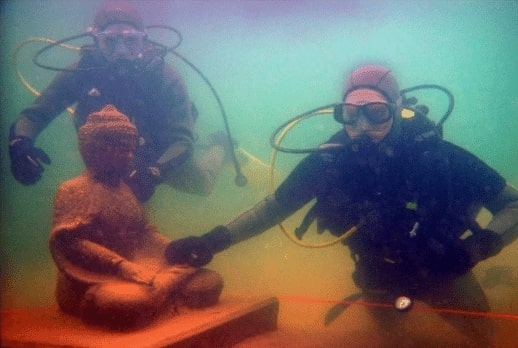

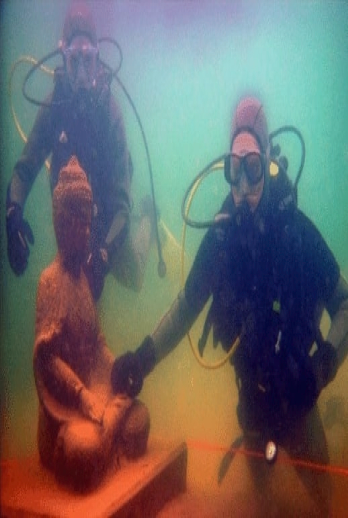

In [ ]:
import cv2
import numpy as np

def resize_images(images, target_shape):
    resized_images = []
    for img in images:
        resized_img = cv2.resize(img, target_shape, interpolation=cv2.INTER_AREA)
        resized_images.append(resized_img)
    return resized_images

def underwater_image_enhancement(images):
    # Resize images to have the same dimensions
    target_shape = images[0].shape[:2]  # Take shape of the first image
    resized_images = resize_images(images, target_shape)

    # Convert images to LAB color space
    lab_images = [cv2.cvtColor(img, cv2.COLOR_BGR2LAB) for img in resized_images]

    # Split LAB channels
    l_channels = [lab[:,:,0] for lab in lab_images]
    a_channels = [lab[:,:,1] for lab in lab_images]
    b_channels = [lab[:,:,2] for lab in lab_images]

    # Fusion based on luminance
    fused_l = np.max(l_channels, axis=0)

    # Fusion based on chrominance
    fused_a = np.mean(a_channels, axis=0)
    fused_b = np.mean(b_channels, axis=0)

    # Merge LAB channels
    fused_lab = cv2.merge((fused_l.astype(np.uint8), fused_a.astype(np.uint8), fused_b.astype(np.uint8)))

    # Convert back to BGR color space
    enhanced_image = cv2.cvtColor(fused_lab, cv2.COLOR_LAB2BGR)

    return enhanced_image

# Example usage
if __name__ == "__main__":
    # Load underwater images
    image_paths = ["underwater_image1.jpg", "underwater_image2.jpg", "underwater_image3.jpg"]
    images = [cv2.imread(path) for path in image_paths]

    # Enhance images
    enhanced_images = [underwater_image_enhancement([img]) for img in images]

    # Display the original and enhanced images
    for original, enhanced in zip(images, enhanced_images):
        from google.colab.patches import cv2_imshow
        cv2_imshow( original)
        cv2_imshow( enhanced)
        cv2.waitKey(0)

    cv2.destroyAllWindows()
